# Emissões de CO₂ per capita

Emissões de dióxido de carbono (CO₂) provenientes da queima de combustíveis fósseis e de processos industriais.

---

- Fonte: Our World in Data - https://ourworldindata.org
- Licença: Dados disponíveis sob licença Creative Commons BY

## 1. Análise Exploratória dos Dados

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1.1 Leitura dos dados

In [60]:
df = pd.read_csv('../data/raw/co-emissions-per-capita.csv')

### 1.2 Apresentação dos dados

In [61]:
df

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123
...,...,...,...,...
26273,Zimbabwe,ZWE,2019,0.672038
26274,Zimbabwe,ZWE,2020,0.547083
26275,Zimbabwe,ZWE,2021,0.645913
26276,Zimbabwe,ZWE,2022,0.648759


### 1.3 Verificar duplicatas

In [62]:
df.duplicated().sum()

np.int64(0)

### 1.4 Análise de tipos de dados

In [63]:
df.dtypes

Entity                                object
Code                                  object
Year                                   int64
Annual CO₂ emissions (per capita)    float64
dtype: object

### 1.5 Verificar valores nulos

In [64]:
df.isnull().sum()

Entity                                  0
Code                                 3287
Year                                    0
Annual CO₂ emissions (per capita)       0
dtype: int64

### 1.6 Verificar consistência dos códigos

In [65]:
print(f"Códigos únicos: {df['Code'].nunique()}")
print(f"Entidades únicas: {df['Entity'].nunique()}")
print(f"Entidades únicas sem código: {df[df['Code'].isnull()]['Entity'].nunique()}")

Códigos únicos: 215
Entidades únicas: 231
Entidades únicas sem código: 16


### 1.7 Identificar entidades únicas que não possuem código

In [66]:
df[df['Code'].isnull()]['Entity'].unique()

array(['Africa', 'Asia', 'Asia (excl. China and India)', 'Europe',
       'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America',
       'North America (excl. USA)', 'Oceania', 'South America',
       'Upper-middle-income countries'], dtype=object)

### 1.8 Identificar países

In [67]:
from pycountry import countries

paises = [country.name for country in countries]

# Verificar nomes alternativos
nao_paises = df.loc[~df["Entity"].isin(paises), "Entity"].unique()
nao_paises

array(['Africa', 'Asia', 'Asia (excl. China and India)', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'British Virgin Islands',
       'Brunei', 'Cape Verde', "Cote d'Ivoire", 'Curacao',
       'Democratic Republic of Congo', 'East Timor', 'Europe',
       'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'High-income countries', 'Iran', 'Kosovo', 'Laos',
       'Low-income countries', 'Lower-middle-income countries',
       'Micronesia (country)', 'Moldova', 'North America',
       'North America (excl. USA)', 'North Korea', 'Oceania', 'Palestine',
       'Russia', 'Saint Helena', 'South America', 'South Korea', 'Syria',
       'Taiwan', 'Tanzania', 'Turkey', 'Upper-middle-income countries',
       'Venezuela', 'Vietnam', 'World'], dtype=object)

In [68]:
paises += ["Bolivia", "Brunei", "Cape Verde", "Cote d'Ivoire", "Democratic Republic of Congo", "East Timor", "Iran", "Kosovo", "Laos", "Micronesia (country)", "Moldova", "North Korea", "Palestine", "Russia", "South Korea", "Syria", "Taiwan", "Tanzania", "Turkey", "Venezuela", "Vietnam"]

nao_paises = df.loc[~df["Entity"].isin(paises), "Entity"].unique().tolist()
nao_paises

['Africa',
 'Asia',
 'Asia (excl. China and India)',
 'Bonaire Sint Eustatius and Saba',
 'British Virgin Islands',
 'Curacao',
 'Europe',
 'Europe (excl. EU-27)',
 'Europe (excl. EU-28)',
 'European Union (27)',
 'European Union (28)',
 'High-income countries',
 'Low-income countries',
 'Lower-middle-income countries',
 'North America',
 'North America (excl. USA)',
 'Oceania',
 'Saint Helena',
 'South America',
 'Upper-middle-income countries',
 'World']

In [69]:
df_paises = df[df["Entity"].isin(paises)].copy()
df_paises

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.010837
2,Afghanistan,AFG,1951,0.011625
3,Afghanistan,AFG,1952,0.011468
4,Afghanistan,AFG,1953,0.013123
...,...,...,...,...
26273,Zimbabwe,ZWE,2019,0.672038
26274,Zimbabwe,ZWE,2020,0.547083
26275,Zimbabwe,ZWE,2021,0.645913
26276,Zimbabwe,ZWE,2022,0.648759


### 1.9 Identificar continentes

In [70]:
continentes = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [71]:
df_continentes = df[df["Entity"].isin(continentes)].copy()
df_continentes

,Entity,Code,Year,Annual CO₂ emissions (per capita)
75,Africa,NaN,1884,0.000168
76,Africa,NaN,1885,0.000279
77,Africa,NaN,1886,0.000360
78,Africa,NaN,1887,0.000358
79,Africa,NaN,1888,0.000603
...,...,...,...,...
21742,South America,NaN,2019,2.562557
21743,South America,NaN,2020,2.299584
21744,South America,NaN,2021,2.522531
21745,South America,NaN,2022,2.548061


### 1.10 Identificar subregiões

In [72]:
subregioes = ['Asia (excl. China and India)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'North America (excl. USA)']

In [73]:
df_subregioes = df[df["Entity"].isin(subregioes)].copy()
df_subregioes

,Entity,Code,Year,Annual CO₂ emissions (per capita)
1275,Asia (excl. China and India),NaN,1750,0.000000
1276,Asia (excl. China and India),NaN,1760,0.000000
1277,Asia (excl. China and India),NaN,1770,0.000000
1278,Asia (excl. China and India),NaN,1780,0.000000
1279,Asia (excl. China and India),NaN,1790,0.000000
...,...,...,...,...
17506,North America (excl. USA),NaN,2019,4.880009
17507,North America (excl. USA),NaN,2020,4.368051
17508,North America (excl. USA),NaN,2021,4.524324
17509,North America (excl. USA),NaN,2022,4.595308


### 1.11 Identificar territórios

In [74]:
territorios = ['Bonaire Sint Eustatius and Saba', 'British Virgin Islands', 'Curacao', 'Saint Helena']

In [75]:
df_territorios = df[df["Entity"].isin(territorios)].copy()
df_territorios

,Entity,Code,Year,Annual CO₂ emissions (per capita)
3217,Bonaire Sint Eustatius and Saba,BES,1950,11.764346
3218,Bonaire Sint Eustatius and Saba,BES,1951,18.477737
3219,Bonaire Sint Eustatius and Saba,BES,1952,10.536059
3220,Bonaire Sint Eustatius and Saba,BES,1953,12.012139
3221,Bonaire Sint Eustatius and Saba,BES,1954,23.610188
...,...,...,...,...
19967,Saint Helena,SHN,2019,2.672014
19968,Saint Helena,SHN,2020,2.016511
19969,Saint Helena,SHN,2021,2.029917
19970,Saint Helena,SHN,2022,1.984913


### 1.12 Identificar categorias de países por renda
- **High-income countries:** Países com alta renda;
- **Low-income countries:** Países de baixa renda;
- **Lower-middle-income countries:** Países de renda média-baixa;
- **Upper-middle-income countries:** Países de renda média-alta.

In [76]:
categorias = ['High-income countries', 'Low-income countries', 'Lower-middle-income countries', 'Upper-middle-income countries']

In [77]:
df_categorias = df[df["Entity"].isin(categorias)].copy()
df_categorias

,Entity,Code,Year,Annual CO₂ emissions (per capita)
10792,High-income countries,NaN,1750,0.050397
10793,High-income countries,NaN,1760,0.054561
10794,High-income countries,NaN,1770,0.065198
10795,High-income countries,NaN,1780,0.075908
10796,High-income countries,NaN,1790,0.093707
...,...,...,...,...
25053,Upper-middle-income countries,NaN,2019,5.798334
25054,Upper-middle-income countries,NaN,2020,5.717949
25055,Upper-middle-income countries,NaN,2021,5.971951
25056,Upper-middle-income countries,NaN,2022,5.962727


### 1.13 Identificar blocos econômicos

In [78]:
blocos = ['European Union (27)', 'European Union (28)']

In [79]:
df_blocos = df[df["Entity"].isin(blocos)].copy()
df_blocos

,Entity,Code,Year,Annual CO₂ emissions (per capita)
8303,European Union (27),NaN,1800,0.009496
8304,European Union (27),NaN,1801,0.007687
8305,European Union (27),NaN,1802,0.075324
8306,European Union (27),NaN,1803,0.007743
8307,European Union (27),NaN,1804,0.028137
...,...,...,...,...
8751,European Union (28),NaN,2019,6.354883
8752,European Union (28),NaN,2020,5.733812
8753,European Union (28),NaN,2021,6.103626
8754,European Union (28),NaN,2022,5.903645


### 1.14 Identificar o mundo inteiro

In [80]:
df_mundo = df[df["Entity"].isin(['World'])].copy()
df_mundo

,Entity,Code,Year,Annual CO₂ emissions (per capita)
25780,World,OWID_WRL,1750,0.012354
25781,World,OWID_WRL,1760,0.013339
25782,World,OWID_WRL,1770,0.015819
25783,World,OWID_WRL,1780,0.017625
25784,World,OWID_WRL,1790,0.021648
...,...,...,...,...
26004,World,OWID_WRL,2019,4.750081
26005,World,OWID_WRL,2020,4.453724
26006,World,OWID_WRL,2021,4.650446
26007,World,OWID_WRL,2022,4.649288


### 1.15 Número de entidades únicas

In [81]:
print("Número de países:", df_paises["Entity"].nunique())
print("Número de continentes:", df_continentes["Entity"].nunique())
print("Número de sub-regiões:", df_subregioes["Entity"].nunique())
print("Número de territórios:", df_territorios["Entity"].nunique())
print("Número de categorias econômicas:", df_categorias["Entity"].nunique())
print("Número de blocos econômicos:", df_blocos["Entity"].nunique())

Número de países: 210
Número de continentes: 6
Número de sub-regiões: 4
Número de territórios: 4
Número de categorias econômicas: 4
Número de blocos econômicos: 2


### 1.16 Análise estatística das emissões globais

In [82]:
df_mundo['Annual CO₂ emissions (per capita)'].describe()

count    229.000000
mean       1.818273
std        1.687314
min        0.012354
25%        0.162037
50%        1.601484
75%        3.484872
max        4.860302
Name: Annual CO₂ emissions (per capita), dtype: float64

Força da Tendência: 0.9997
Força da Sazonalidade: 0.2547


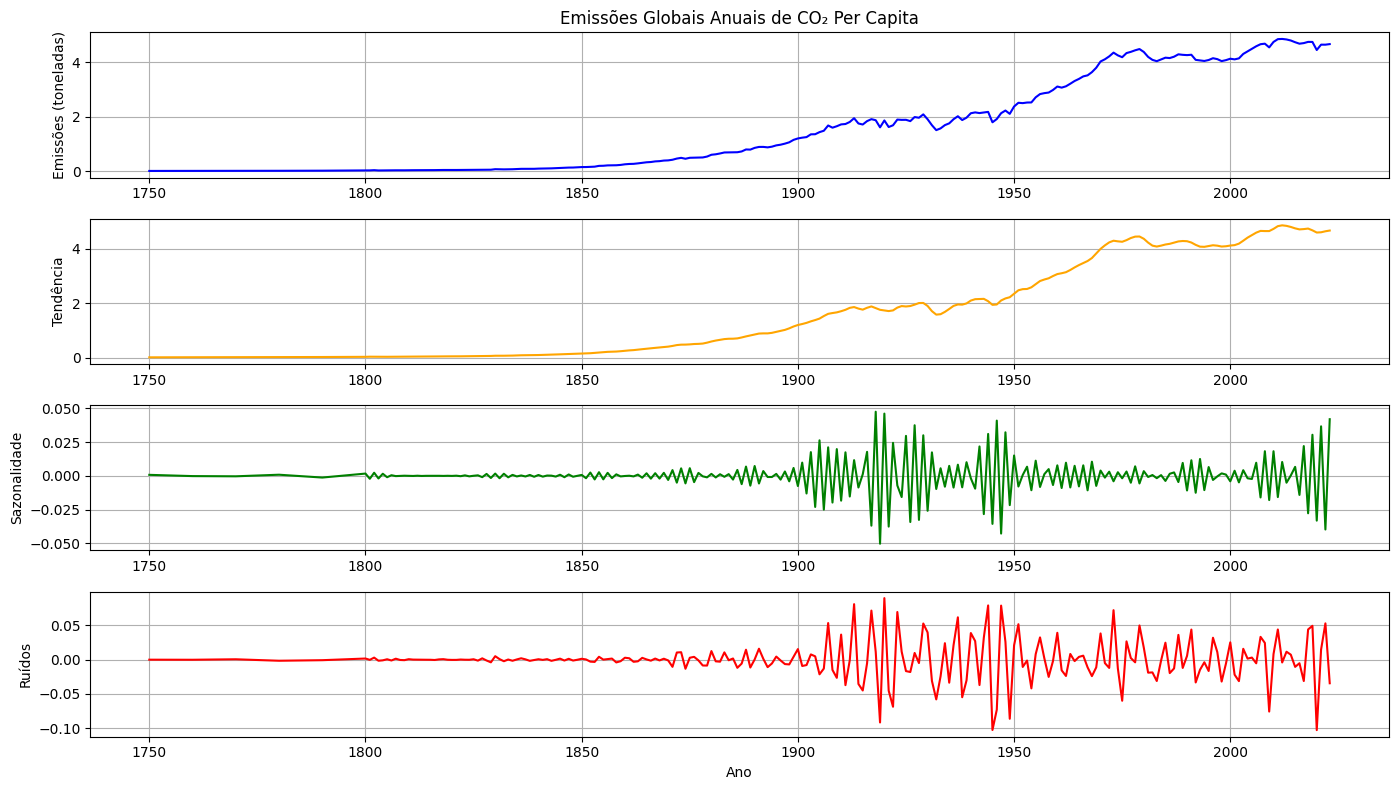

In [83]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_mundo["Annual CO₂ emissions (per capita)"], period=2)
result = stl.fit()

tendencia = result.trend
sazonalidade = result.seasonal
ruidos = result.resid

var_r = np.var(ruidos)
var_tr = np.var(tendencia + ruidos)
var_sr = np.var(sazonalidade + ruidos)
forca_tendencia = round(1 - var_r / var_tr, 4) if var_tr > 0 else np.nan
forca_sazonalidade = round(1 - var_r / var_sr, 4) if var_sr > 0 else np.nan
print(f"Força da Tendência: {forca_tendencia}")
print(f"Força da Sazonalidade: {forca_sazonalidade}")

plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(df_mundo['Year'], df_mundo['Annual CO₂ emissions (per capita)'], label='Original', color='blue')
plt.title('Emissões Globais Anuais de CO₂ Per Capita')
plt.ylabel('Emissões (toneladas)')
plt.grid(True)
plt.subplot(4, 1, 2)
plt.plot(df_mundo['Year'], tendencia, label='Tendência', color='orange')
plt.ylabel('Tendência')
plt.grid(True)
plt.subplot(4, 1, 3)
plt.plot(df_mundo['Year'], sazonalidade, label='Sazonalidade', color='green')
plt.ylabel('Sazonalidade')
plt.grid(True)
plt.subplot(4, 1, 4)
plt.plot(df_mundo['Year'], residuos, label='Ruídos', color='red')
plt.ylabel('Ruídos')
plt.xlabel('Ano')
plt.grid(True)
plt.tight_layout()
plt.show()

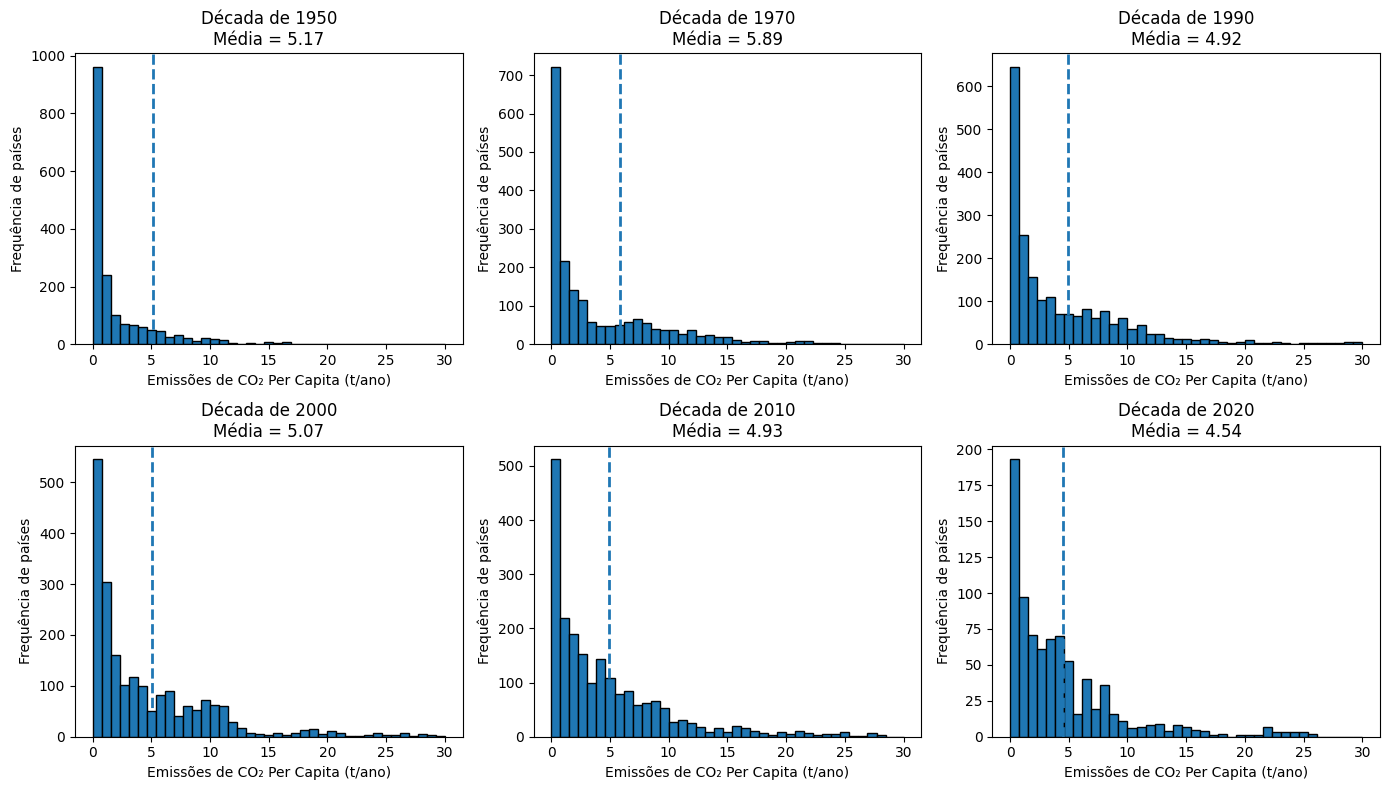

In [84]:
# Décadas desejadas
decadas = [1950, 1970, 1990, 2000, 2010, 2020]

# Faixas de emissão (bins) para o histograma
bins = np.linspace(0, 30, 40)

df = df_paises.copy()

# Converte ano para década mais próxima (1950 → 1950, 1952 → 1950)
df['Decade'] = (df['Year'] // 10) * 10

# Filtra somente as décadas desejadas
df = df[df['Decade'].isin(decadas)]


plt.figure(figsize=(14, 8))
for i, decada in enumerate(decadas, 1):
    df_decada = df[df['Decade'] == decada]

    # Média da década
    media_decada = df_decada['Annual CO₂ emissions (per capita)'].mean()

    plt.subplot(2, 3, i)
    plt.hist(
        df_decada['Annual CO₂ emissions (per capita)'],
        bins=bins,
        edgecolor='black'
    )

    # Linha vertical da média
    plt.axvline(media_decada, linewidth=2, linestyle='--')
    plt.title(f'Década de {decada}\nMédia = {media_decada:.2f}')
    plt.xlabel('Emissões de CO₂ Per Capita (t/ano)')
    plt.ylabel('Frequência de países')

plt.tight_layout()
plt.show()

## 2. Visualização dos dados

### Q1. Evolução Global das Emissões de CO₂ Per Capita

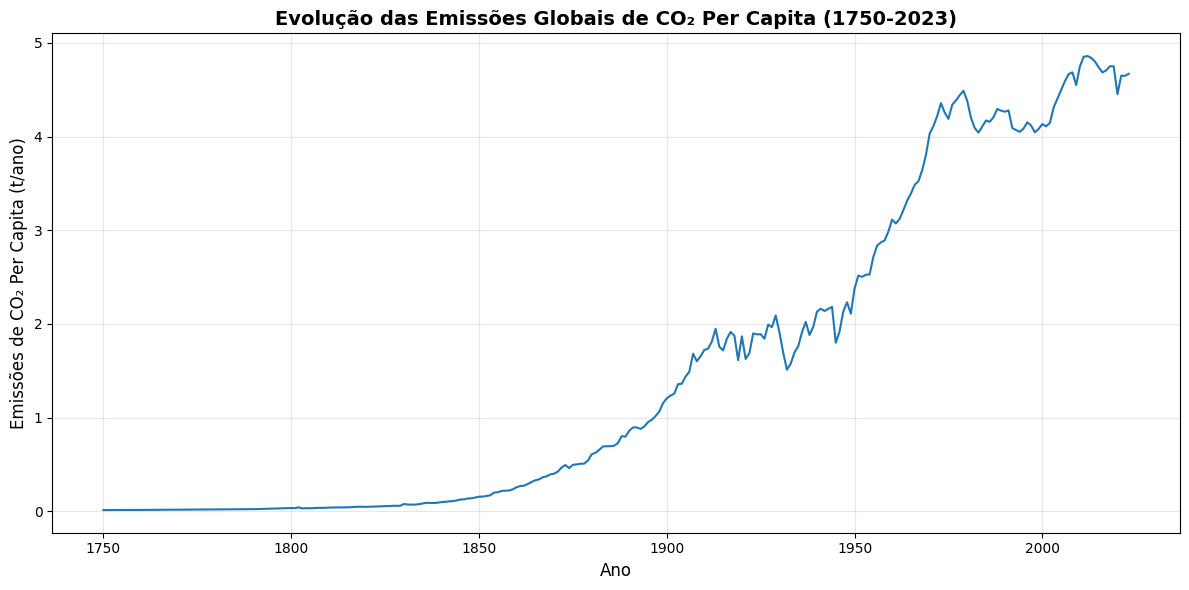

In [85]:
plt.figure(figsize=(12, 6))
sns.lineplot(df_mundo, x='Year', y='Annual CO₂ emissions (per capita)')
plt.title('Evolução das Emissões Globais de CO₂ Per Capita (1750-2023)',
    fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões de CO₂ Per Capita (t/ano)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Q2. Evolução Comparativa das Emissões de CO₂ per Capita por Continente

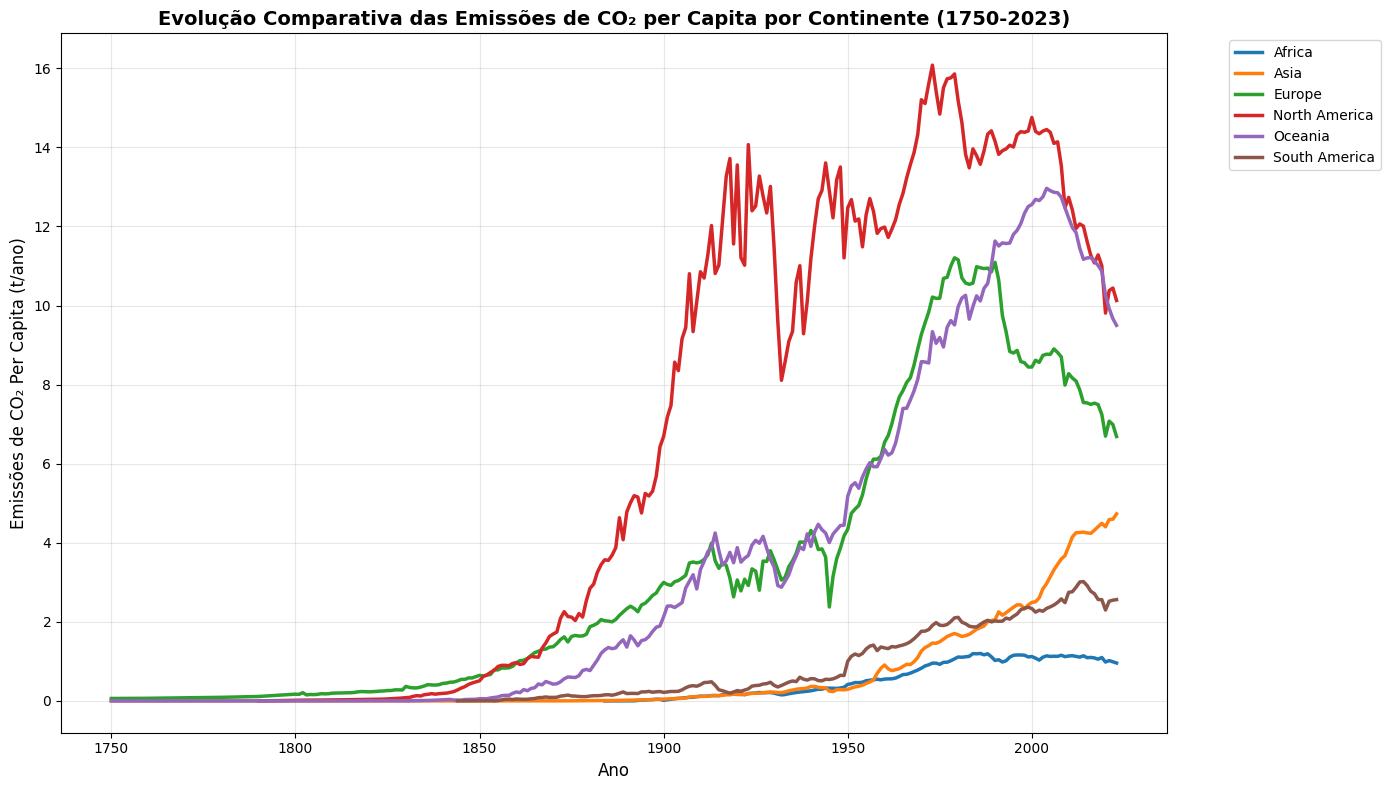

In [86]:
plt.figure(figsize=(14, 8))
for continente in continentes:
    dados = df_continentes[df_continentes['Entity'] == continente]
    plt.plot(dados['Year'], dados['Annual CO₂ emissions (per capita)'],
            label=continente, linewidth=2.5)

plt.title('Evolução Comparativa das Emissões de CO₂ per Capita por Continente (1750-2023)',
          fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões de CO₂ Per Capita (t/ano)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Q3. Países com Maiores Emissões de CO₂ Per Capita em 2023

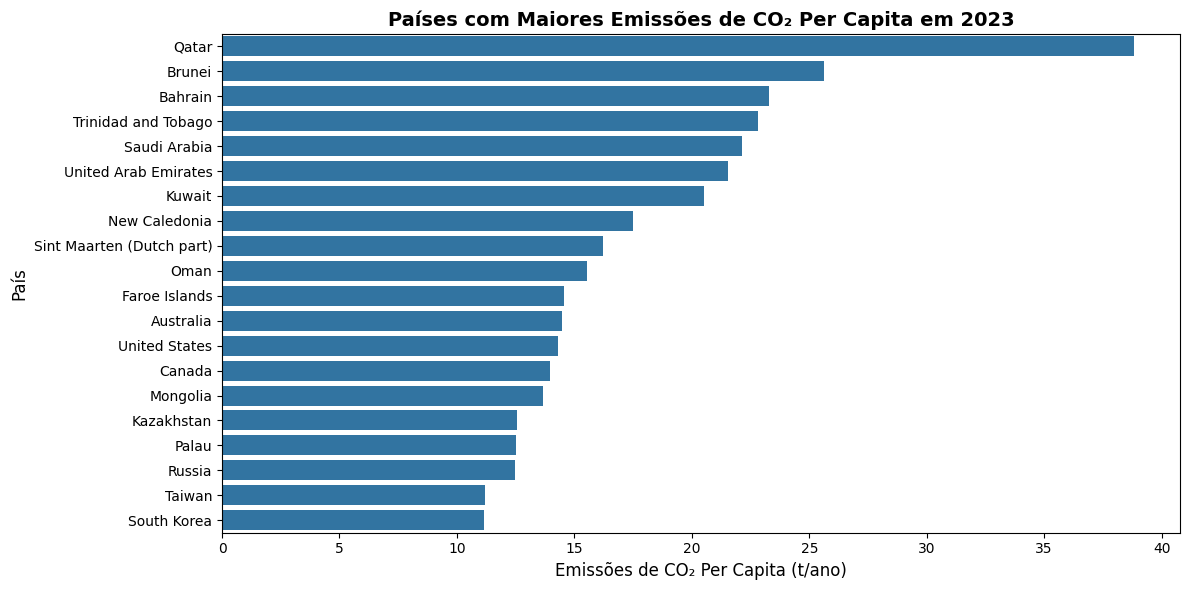

In [87]:
df_2023 = df_paises[df_paises['Year'] == 2023]
top_10_2023 = df_2023.nlargest(20, 'Annual CO₂ emissions (per capita)')
plt.figure(figsize=(12, 6))
sns.barplot(top_10_2023, x='Annual CO₂ emissions (per capita)', y='Entity')
plt.title(f'Países com Maiores Emissões de CO₂ Per Capita em 2023', fontsize=14, fontweight='bold')
plt.xlabel('Emissões de CO₂ Per Capita (t/ano)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.tight_layout()
plt.show()

### Q4. Comparação das Emissões de CO₂ Per Capita por Categorias Econômicas

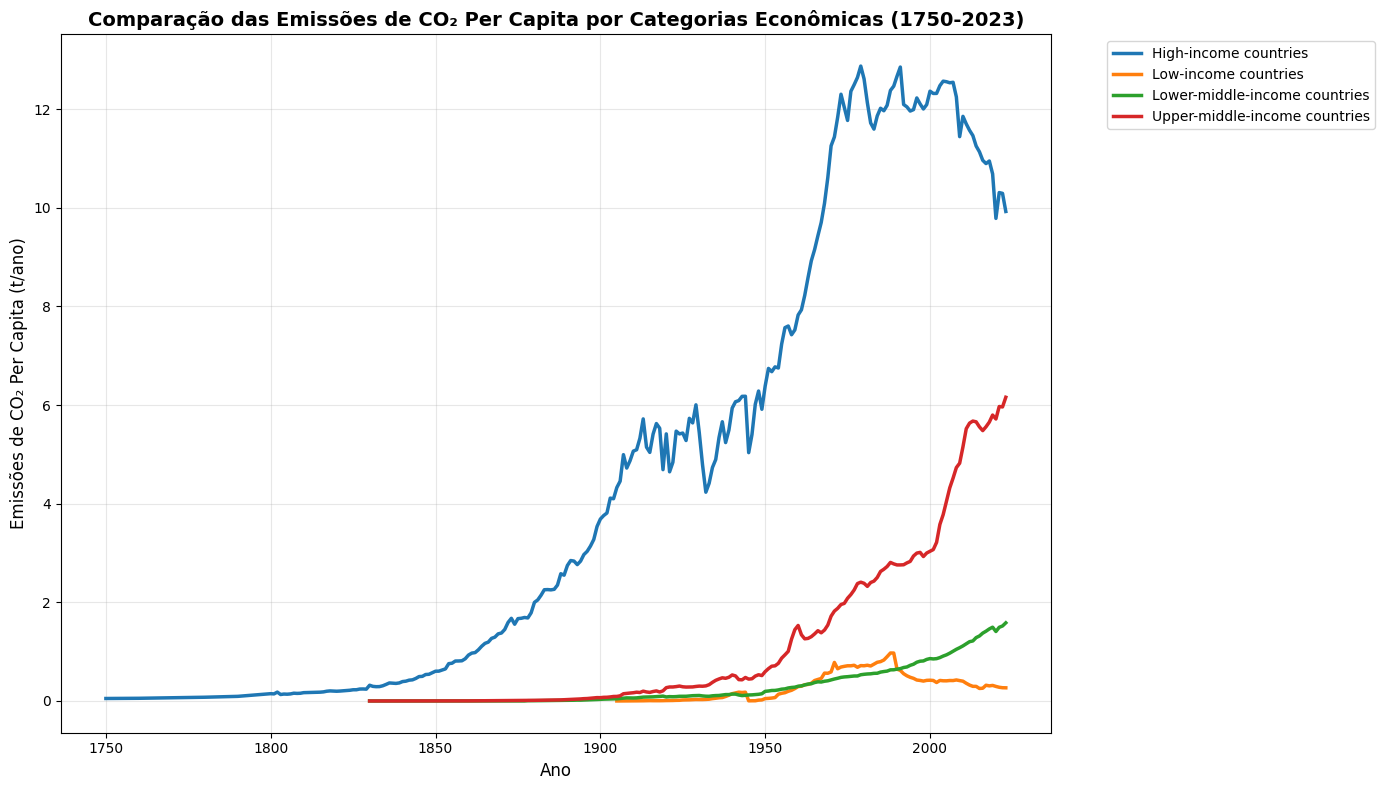

In [88]:
plt.figure(figsize=(14, 8))
for categoria in categorias:
    dados = df_categorias[df_categorias['Entity'] == categoria]
    plt.plot(dados['Year'], dados['Annual CO₂ emissions (per capita)'],
            label=categoria, linewidth=2.5)

plt.title('Comparação das Emissões de CO₂ Per Capita por Categorias Econômicas (1750-2023)',
          fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissões de CO₂ Per Capita (t/ano)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Q5. Evolução das Emissões Globais de CO₂ per Capita na Era da Revolução Industrial

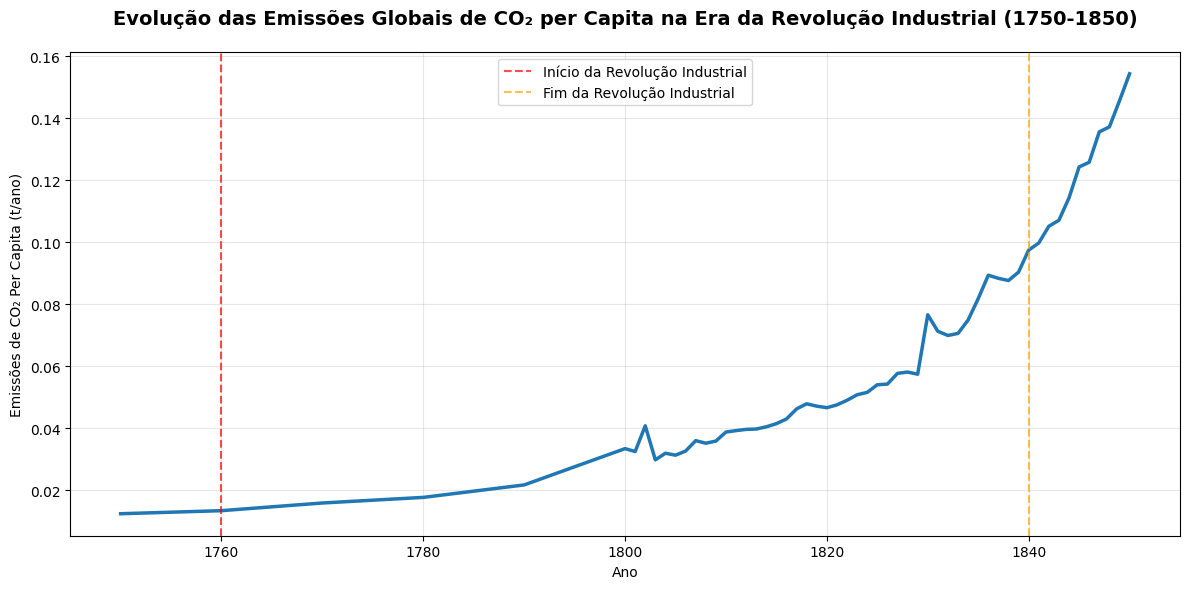

In [89]:
plt.figure(figsize=(12, 6))
revolucao_industrial = df_mundo[(df_mundo['Year'] >= 1750) & (df_mundo['Year'] <= 1850)]
plt.plot(revolucao_industrial['Year'], revolucao_industrial['Annual CO₂ emissions (per capita)'], linewidth=2.5)
plt.axvline(1760, color='red', linestyle='--', alpha=0.7, label='Início da Revolução Industrial')
plt.axvline(1840, color='orange', linestyle='--', alpha=0.7, label='Fim da Revolução Industrial')
plt.title('Evolução das Emissões Globais de CO₂ per Capita na Era da Revolução Industrial (1750-1850)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Emissões de CO₂ Per Capita (t/ano)')
plt.xlabel('Ano')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Q6. Evolução das Emissões Globais de CO₂ per Capita no Período Pós-Segunda Guerra Mundial

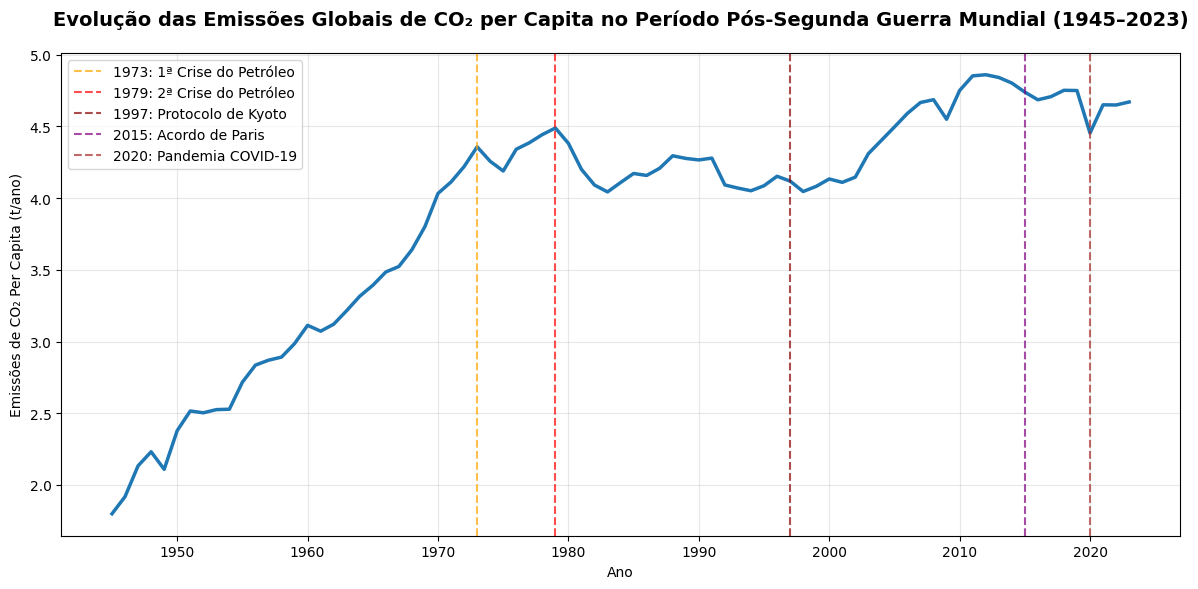

In [90]:
plt.figure(figsize=(12, 6))
pos_guerra = df_mundo[df_mundo['Year'] >= 1945]
plt.plot(pos_guerra['Year'], pos_guerra['Annual CO₂ emissions (per capita)'], linewidth=2.5)
plt.axvline(1973, color='orange', linestyle='--', alpha=0.7, label='1973: 1ª Crise do Petróleo')
plt.axvline(1979, color='red', linestyle='--', alpha=0.7, label='1979: 2ª Crise do Petróleo')
plt.axvline(1997, color='darkred', linestyle='--', alpha=0.7, label='1997: Protocolo de Kyoto')
plt.axvline(2015, color='purple', linestyle='--', alpha=0.7, label='2015: Acordo de Paris')
plt.axvline(2020, color='brown', linestyle='--', alpha=0.7, label='2020: Pandemia COVID-19')
plt.title('Evolução das Emissões Globais de CO₂ per Capita no Período Pós-Segunda Guerra Mundial (1945–2023)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Emissões de CO₂ Per Capita (t/ano)')
plt.xlabel('Ano')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Q7. Evolução das Emissões de CO₂ per Capita no Brasil

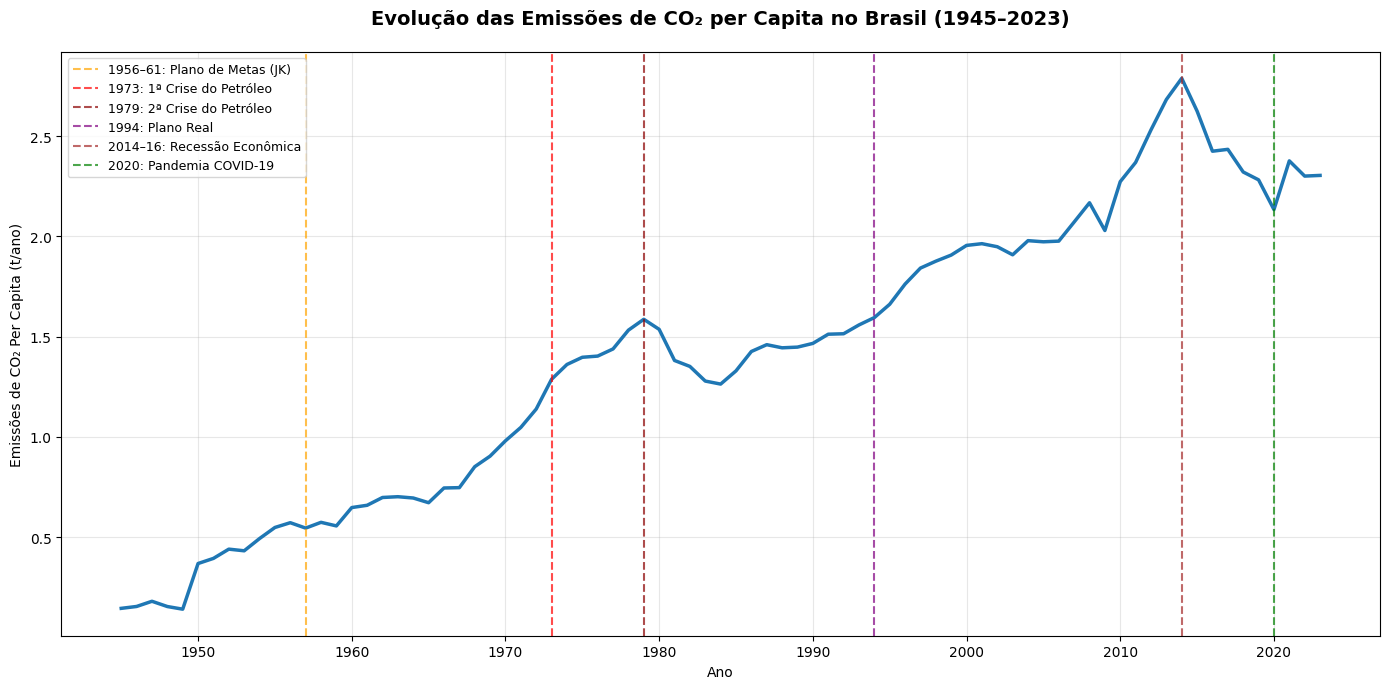

In [91]:
df_brasil = df_paises[(df_paises['Entity'] == 'Brazil') & (df_paises['Year'] >= 1945)]

plt.figure(figsize=(14, 7))
plt.plot(df_brasil['Year'], df_brasil['Annual CO₂ emissions (per capita)'], linewidth=2.5)

plt.axvline(1957, color='orange', linestyle='--', alpha=0.7, label='1956–61: Plano de Metas (JK)')
plt.axvline(1973, color='red', linestyle='--', alpha=0.7, label='1973: 1ª Crise do Petróleo')
plt.axvline(1979, color='darkred', linestyle='--', alpha=0.7, label='1979: 2ª Crise do Petróleo')
plt.axvline(1994, color='purple', linestyle='--', alpha=0.7, label='1994: Plano Real')
plt.axvline(2014, color='brown', linestyle='--', alpha=0.7, label='2014–16: Recessão Econômica')
plt.axvline(2020, color='green', linestyle='--', alpha=0.7, label='2020: Pandemia COVID-19')

plt.title('Evolução das Emissões de CO₂ per Capita no Brasil (1945–2023)',
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Emissões de CO₂ Per Capita (t/ano)')
plt.xlabel('Ano')

plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

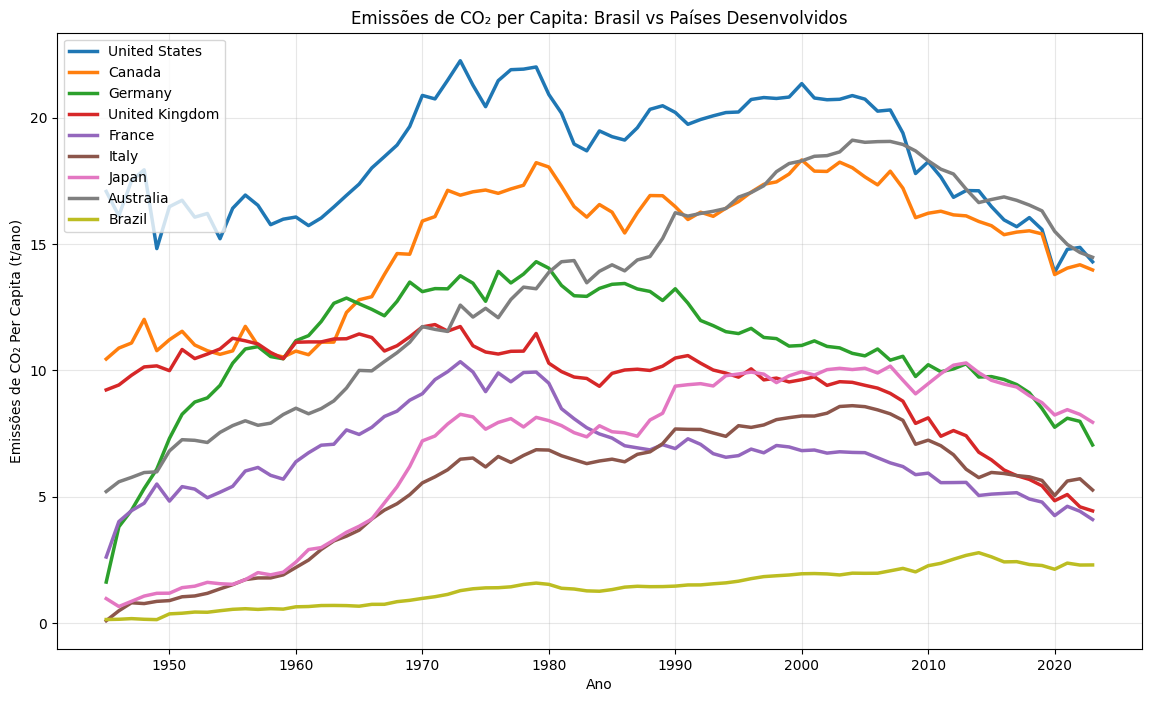

In [92]:
paises_desenvolvidos = ['United States', 'Canada', 'Germany', 'United Kingdom', 'France', 'Italy', 'Japan', 'Australia']
df_desenvolvidos = df_paises[(df_paises['Entity'].isin(paises_desenvolvidos + ['Brazil'])) & (df_paises['Year'] >= 1945)]

plt.figure(figsize=(14, 8))
for pais in paises_desenvolvidos + ['Brazil']:
    dados = df_desenvolvidos[df_desenvolvidos['Entity'] == pais]
    plt.plot(dados['Year'], dados['Annual CO₂ emissions (per capita)'],
            label=pais, linewidth=2.5)

plt.title('Emissões de CO₂ per Capita: Brasil vs Países Desenvolvidos')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ Per Capita (t/ano)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()